In [2]:
import imp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)


In [3]:
df1 = pd.read_csv("job_market_dataset.csv")
df1.sample(5)

,Job_Title,Experience_Years,Education_Level,Salary,Job_Type,Location,Company_Size,Age,Industry,Remote_Work,Skills,Performance_Rating
2984,Marketing Manager,20,PhD,50982.0,Full-time,Seattle,Large,36,Manufacturing,No,C++,3
1958,Sales Executive,16,Master,NaN,Full-time,New York,Small,64,Retail,No,Python,5
4928,Nurse,30,High School,120804.0,Full-time,Austin,Large,30,Healthcare,No,Data Analysis,3
2802,Software Engineer,33,Master,143112.0,Full-time,Seattle,Enterprise,46,Finance,Yes,Excel,1
4621,Nurse,14,Bachelor,38280.0,Contract,Chicago,Small,26,IT,No,Data Analysis,4


In [4]:
df2= pd.read_csv("students_performance_dataset.csv")
df2.sample(5)
df2['Part_Time_Job'].unique()

array(['Yes', 'No'], dtype=object)

### For the EDA ill be selecting student performance dataset

In [5]:
df = pd.read_csv("students_performance_dataset.csv")
df.head(8)

,Student_ID,Gender,Study_Hours,Family_Income,Attendance,Test_Score,Extra_Activities,Internet_Access,Parental_Education,School_Type,Health_Status,Part_Time_Job
0,1,Female,8.0,Medium,83,70.0,Sports,No,High School,Private,Good,Yes
1,2,Male,NaN,NaN,68,94.0,Debate,Yes,PhD,Private,Good,Yes
2,3,Male,3.0,Low,92,65.0,Sports,No,PhD,Government,Excellent,Yes
3,4,Other,9.0,Medium,75,44.0,Debate,Yes,Bachelor,Private,Good,No
4,5,Other,0.0,Medium,91,3.0,Sports,No,PhD,Private,Poor,Yes
5,6,Other,12.0,Low,92,0.0,Sports,Yes,Master,Private,Average,Yes
6,7,Female,3.0,NaN,66,59.0,Debate,Yes,Master,Government,Excellent,Yes
7,8,Other,12.0,Medium,98,49.0,Debate,Yes,PhD,Government,Good,No


In [38]:
df_og = df.copy()

print("Shape:", df_og.shape)
print("\nMissing values per column:\n", df_og.isnull().sum())
print("\nDuplicate rows:", df_og.duplicated().sum())
print("\nColumn data types:\n", df_og.dtypes)

Shape: (5050, 11)

Missing values per column:
 Gender                   0
Study_Hours            253
Family_Income          252
Attendance               0
Test_Score             252
Extra_Activities      1245
Internet_Access          0
Parental_Education       0
School_Type              0
Health_Status            0
Part_Time_Job            0
dtype: int64

Duplicate rows: 50

Column data types:
 Gender                 object
Study_Hours           float64
Family_Income          object
Attendance              int64
Test_Score            float64
Extra_Activities       object
Internet_Access        object
Parental_Education     object
School_Type            object
Health_Status          object
Part_Time_Job          object
dtype: object


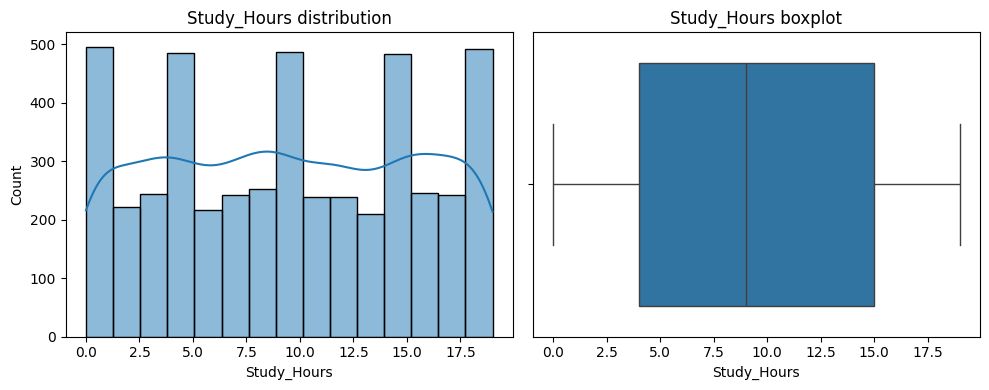

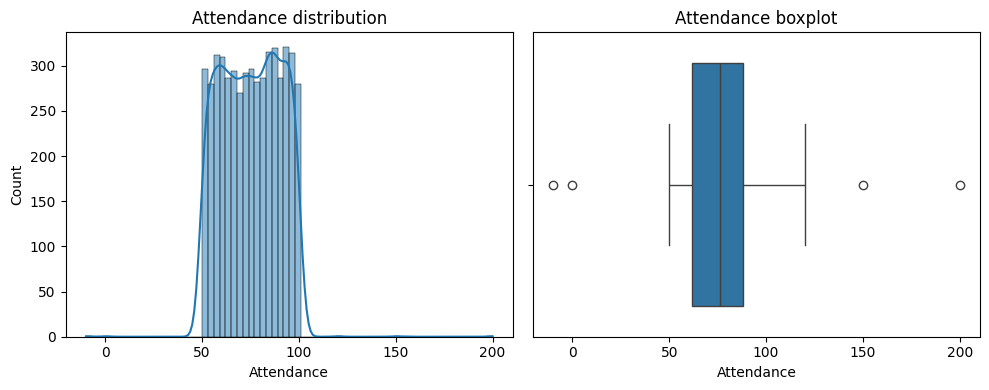

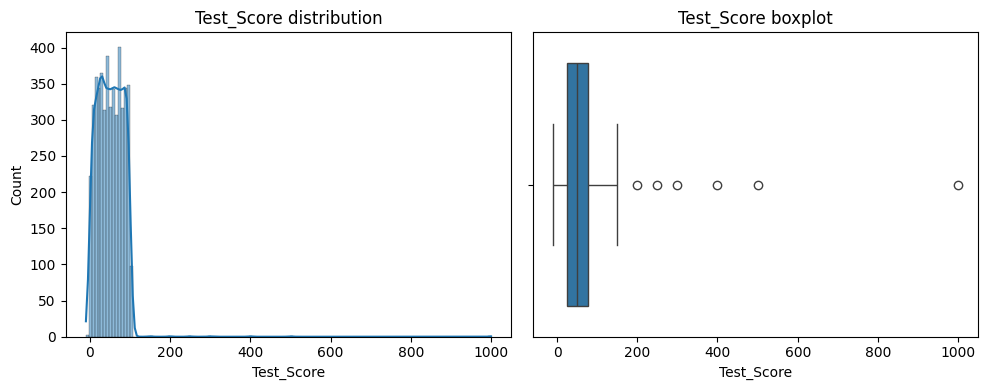

In [ ]:
num_cols = df_og.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(10,4))
    
    # Hist
    plt.subplot(1,2,1)
    sns.histplot(df_og[col].dropna(), kde=True)
    plt.title(f"{col} distribution")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df_og[col])
    plt.title(f"{col} boxplot")
    
    plt.tight_layout()
    plt.show()


In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          5050 non-null   int64  
 1   Gender              5050 non-null   object 
 2   Study_Hours         4797 non-null   float64
 3   Family_Income       4798 non-null   object 
 4   Attendance          5050 non-null   int64  
 5   Test_Score          4798 non-null   float64
 6   Extra_Activities    3805 non-null   object 
 7   Internet_Access     5050 non-null   object 
 8   Parental_Education  5050 non-null   object 
 9   School_Type         5050 non-null   object 
 10  Health_Status       5050 non-null   object 
 11  Part_Time_Job       5050 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 473.6+ KB
None
        Student_ID  Study_Hours   Attendance   Test_Score
count  5050.000000  4797.000000  5050.000000  4798.000000
mean   2501.367525    

#### There are total 5050 cells in the dataset but also a few null cells which we need to clear out

from the data what i infer is :
1. drop `Student ID`
2. Label encode `Gender` as 0 and 1
3. One Hot encoding for `Fam income` and `Extra activities` and `parental education` 
4. Label encode `Internet` as 0 and 1
5. label encode `job status`
6. and `health status` OHE encoding

In [40]:
df['Health_Status'].unique()
df['Part_Time_Job'].unique()
df['Parental_Education'].unique()
df['Gender'].unique()


array(['Female', 'Male', 'Other'], dtype=object)

i need to OHE the gender as well

In [12]:
df.drop(['Student_ID'],axis= 1,inplace= True)

In [14]:
# category = df.select_dtypes(include= ['object']).columns.tolist()
category = df[['Family_Income','Extra_Activities','Parental_Education','Health_Status','Gender']]
encoder = OneHotEncoder(sparse_output= False)

In [15]:
category

,Family_Income,Extra_Activities,Parental_Education,Health_Status,Gender
0,Medium,Sports,High School,Good,Female
1,NaN,Debate,PhD,Good,Male
2,Low,Sports,PhD,Excellent,Male
3,Medium,Debate,Bachelor,Good,Other
4,Medium,Sports,PhD,Poor,Other
...,...,...,...,...,...
5045,Medium,Debate,Bachelor,Excellent,Other
5046,High,Sports,Master,Excellent,Other
5047,Medium,Sports,High School,Excellent,Male
5048,Medium,Music,PhD,Excellent,Other


In [16]:
encoded = encoder.fit_transform(category)
encoded_cols = encoder.get_feature_names_out(category.columns)

In [17]:
encoded_df = pd.DataFrame(encoded , columns= encoded_cols)
df_encoded = pd.concat([df.drop(category.columns, axis= 1),encoded_df],axis=1)

In [18]:
df_encoded.head()

,Study_Hours,Attendance,Test_Score,Internet_Access,School_Type,Part_Time_Job,Family_Income_High,Family_Income_Low,Family_Income_Medium,Family_Income_nan,Extra_Activities_Debate,Extra_Activities_Music,Extra_Activities_Sports,Extra_Activities_nan,Parental_Education_Bachelor,Parental_Education_High School,Parental_Education_Master,Parental_Education_PhD,Health_Status_Average,Health_Status_Excellent,Health_Status_Good,Health_Status_Poor,Gender_Female,Gender_Male,Gender_Other
0,8.0,83,70.0,No,Private,Yes,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,NaN,68,94.0,Yes,Private,Yes,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.0,92,65.0,No,Government,Yes,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,9.0,75,44.0,Yes,Private,No,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,91,3.0,No,Private,Yes,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


The categorical data is now encoded 
for the next step i will label encode binary cols


In [19]:
df['Part_Time_Job'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df_encoded['Internet_Access'] = df_encoded['Internet_Access'].map({"Yes" : 1,
                                                   "No" : 0})
df_encoded['School_Type'] = df_encoded['School_Type'].map({'Private' : 1,
                                           "Government":0})
df_encoded['Part_Time_Job'] = df_encoded['Part_Time_Job'].map({"Yes":1,
                                               "No":0})

In [21]:
df_encoded.sample(20)

,Study_Hours,Attendance,Test_Score,Internet_Access,School_Type,Part_Time_Job,Family_Income_High,Family_Income_Low,Family_Income_Medium,Family_Income_nan,Extra_Activities_Debate,Extra_Activities_Music,Extra_Activities_Sports,Extra_Activities_nan,Parental_Education_Bachelor,Parental_Education_High School,Parental_Education_Master,Parental_Education_PhD,Health_Status_Average,Health_Status_Excellent,Health_Status_Good,Health_Status_Poor,Gender_Female,Gender_Male,Gender_Other
1244,19.0,89,43.0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3809,2.0,61,71.0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4305,18.0,87,57.0,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13,1.0,59,7.0,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1668,8.0,94,43.0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1785,0.0,90,89.0,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3735,NaN,85,32.0,0,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4524,13.0,94,30.0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4361,17.0,100,63.0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3667,5.0,80,95.0,0,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


now to drop all the nan values as columns and then do Data visualization 

In [22]:
# df3 = df_encoded.drop([''])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Study_Hours                     4797 non-null   float64
 1   Attendance                      5050 non-null   int64  
 2   Test_Score                      4798 non-null   float64
 3   Internet_Access                 5050 non-null   int64  
 4   School_Type                     5050 non-null   int64  
 5   Part_Time_Job                   5050 non-null   int64  
 6   Family_Income_High              5050 non-null   float64
 7   Family_Income_Low               5050 non-null   float64
 8   Family_Income_Medium            5050 non-null   float64
 9   Family_Income_nan               5050 non-null   float64
 10  Extra_Activities_Debate         5050 non-null   float64
 11  Extra_Activities_Music          5050 non-null   float64
 12  Extra_Activities_Sports         50

In [23]:
# Family_Income_nan  
# Extra_Activities_nan 
df_encoded.drop(['Family_Income_nan','Extra_Activities_nan'],axis=1,inplace=True)


In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Study_Hours                     4797 non-null   float64
 1   Attendance                      5050 non-null   int64  
 2   Test_Score                      4798 non-null   float64
 3   Internet_Access                 5050 non-null   int64  
 4   School_Type                     5050 non-null   int64  
 5   Part_Time_Job                   5050 non-null   int64  
 6   Family_Income_High              5050 non-null   float64
 7   Family_Income_Low               5050 non-null   float64
 8   Family_Income_Medium            5050 non-null   float64
 9   Extra_Activities_Debate         5050 non-null   float64
 10  Extra_Activities_Music          5050 non-null   float64
 11  Extra_Activities_Sports         5050 non-null   float64
 12  Parental_Education_Bachelor     50

i will fill `study hour`with median `test score` with mean 

In [25]:
df_encoded['Study_Hours'].fillna(df_encoded['Study_Hours'].median(),inplace=True)
df_encoded['Test_Score'].fillna(df_encoded['Test_Score'].mean(),inplace= True)

C:\Users\Harsh Giri\AppData\Local\Temp\ipykernel_5980\1870309777.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['Study_Hours'].fillna(df_encoded['Study_Hours'].median(),inplace=True)
C:\Users\Harsh Giri\AppData\Local\Temp\ipykernel_5980\1870309777.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [32]:


num_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Columns :\n")
print(df_encoded[num_cols].describe().T[['mean','50%','std','min','max']].rename(columns={'50%':'median'}))


Numerical Columns :

                                     mean     median        std   min     max
Study_Hours                      9.481386   9.000000   5.659108   0.0    19.0
Attendance                      75.186337  76.000000  15.000797 -10.0   200.0
Test_Score                      50.973114  50.973114  32.765434 -10.0  1000.0
Internet_Access                  0.502574   1.000000   0.500043   0.0     1.0
School_Type                      0.494059   0.000000   0.500014   0.0     1.0
Part_Time_Job                    0.502772   1.000000   0.500042   0.0     1.0
Family_Income_High               0.315248   0.000000   0.464660   0.0     1.0
Family_Income_Low                0.320000   0.000000   0.466522   0.0     1.0
Family_Income_Medium             0.314851   0.000000   0.464503   0.0     1.0
Extra_Activities_Debate          0.241188   0.000000   0.427847   0.0     1.0
Extra_Activities_Music           0.251485   0.000000   0.433910   0.0     1.0
Extra_Activities_Sports          0.260792  

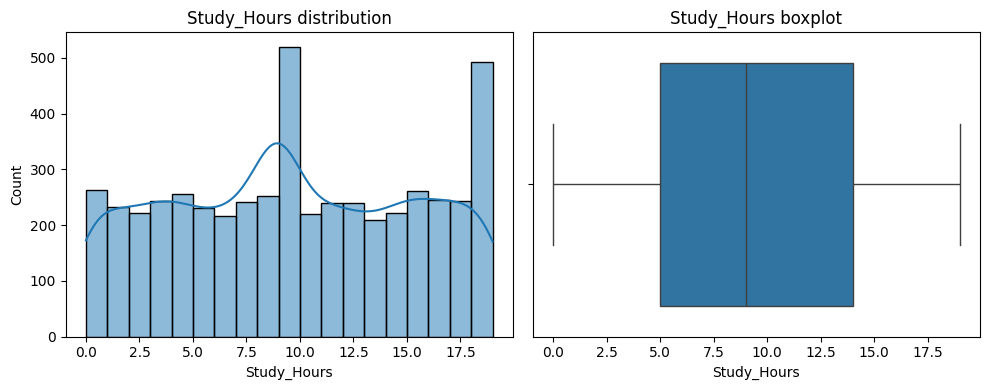

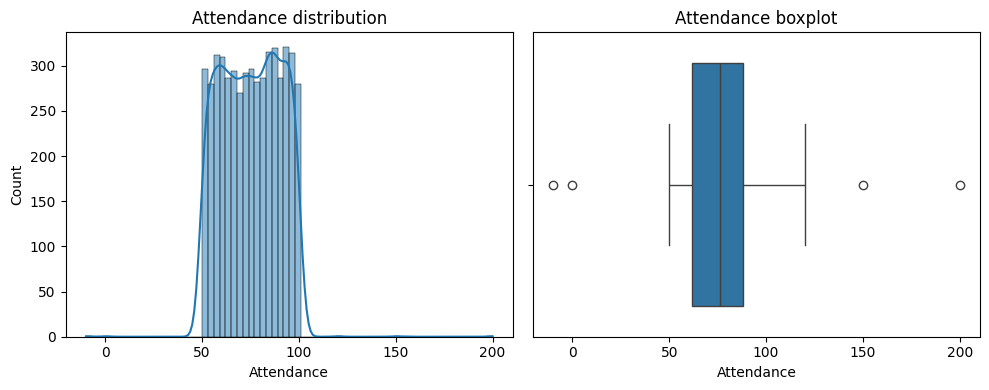

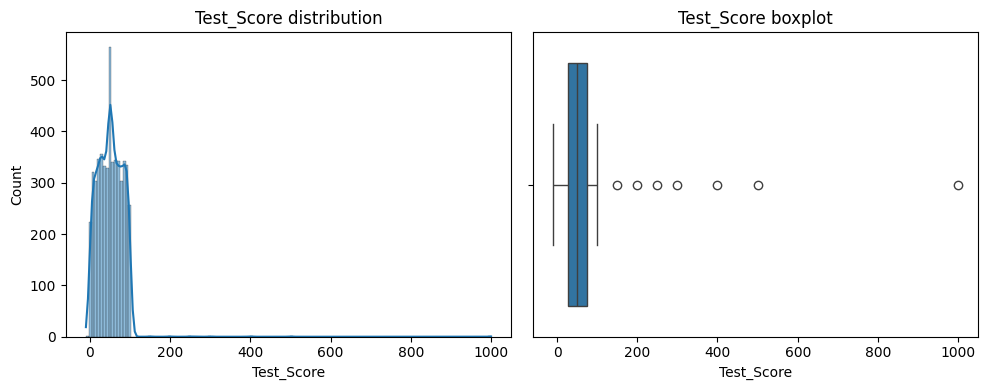

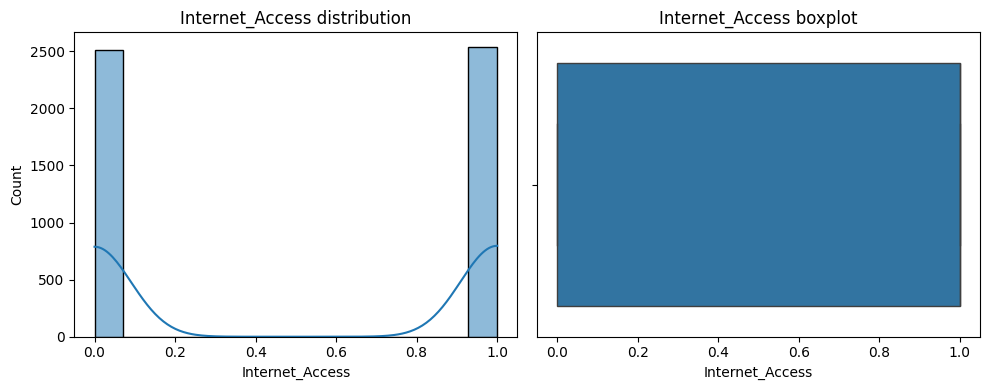

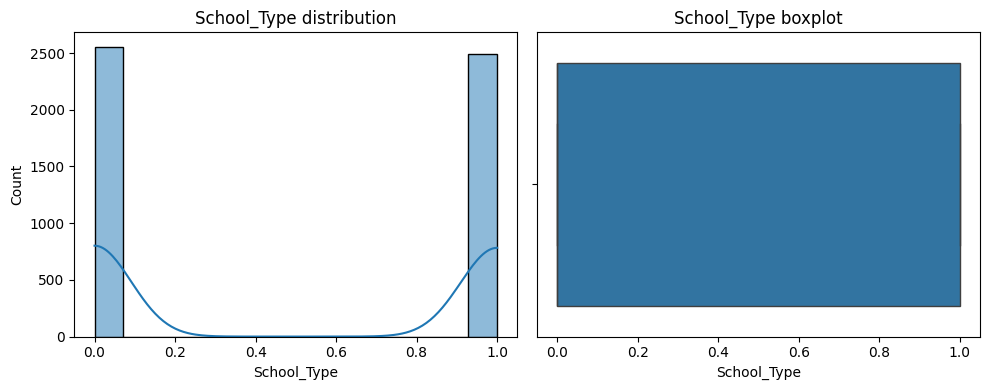

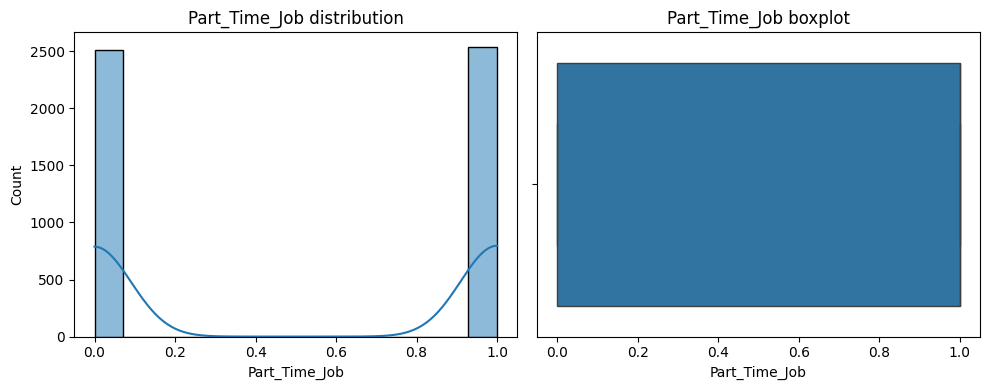

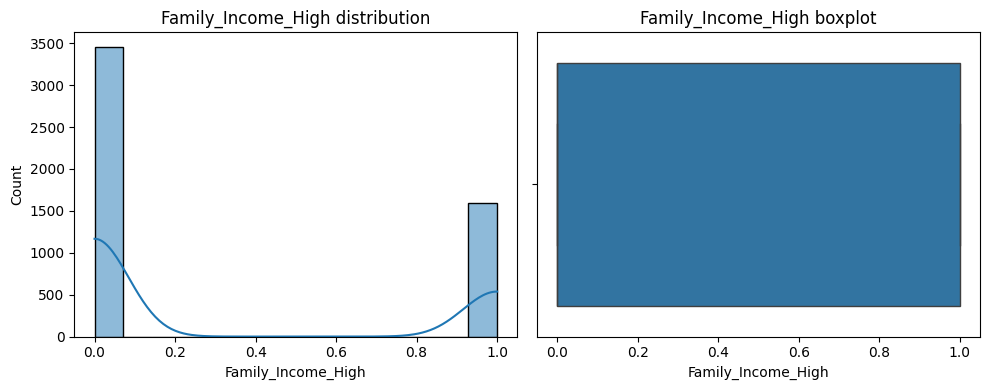

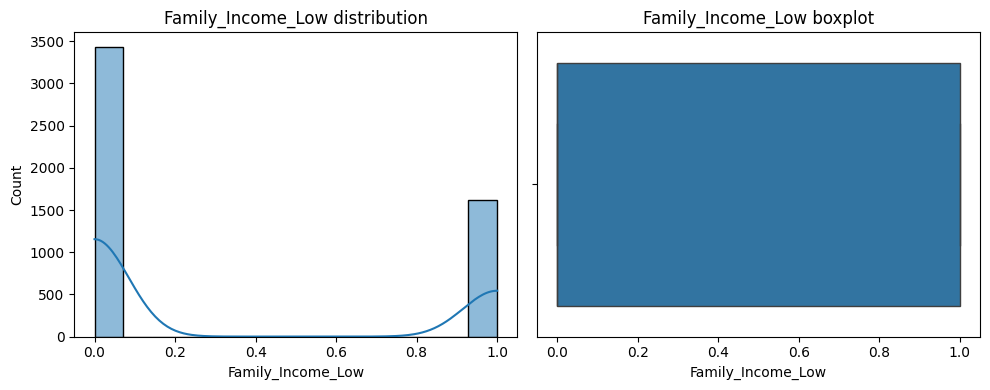

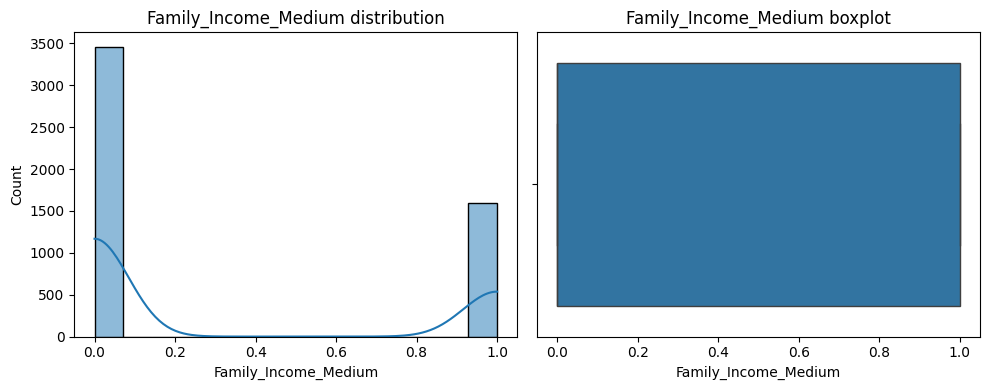

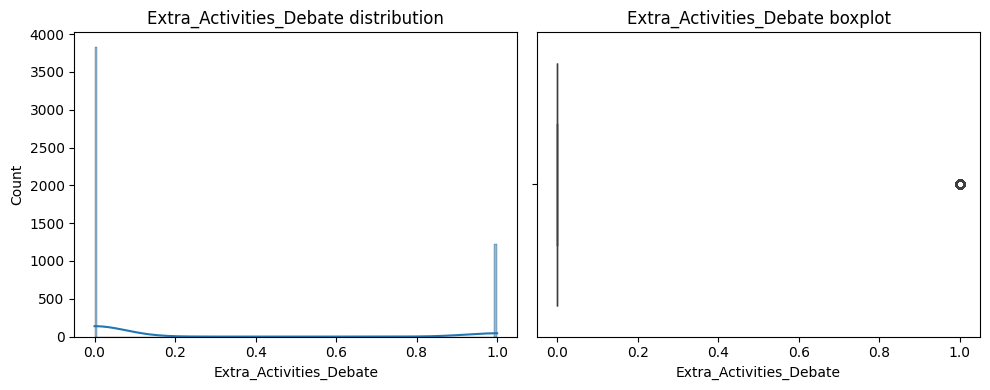

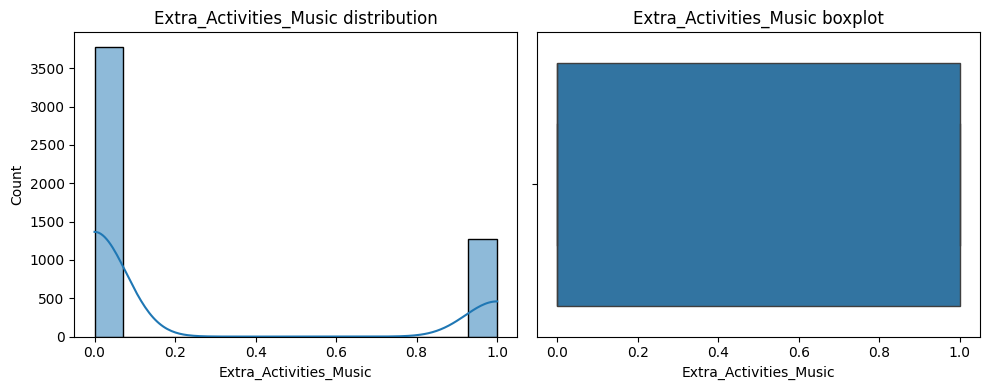

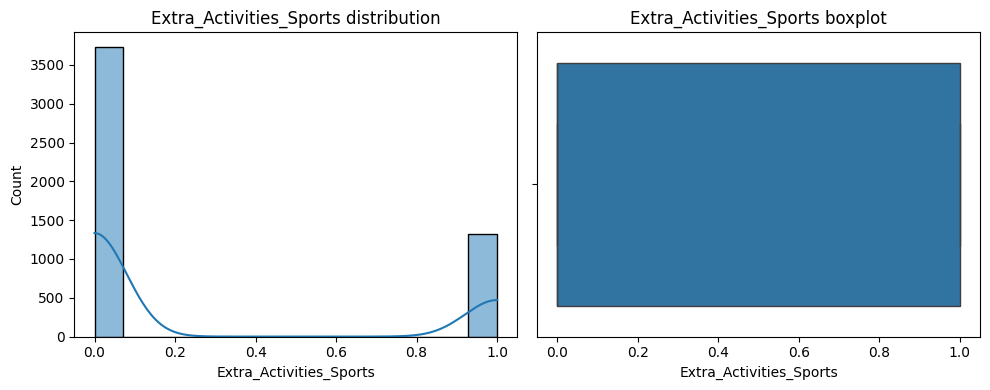

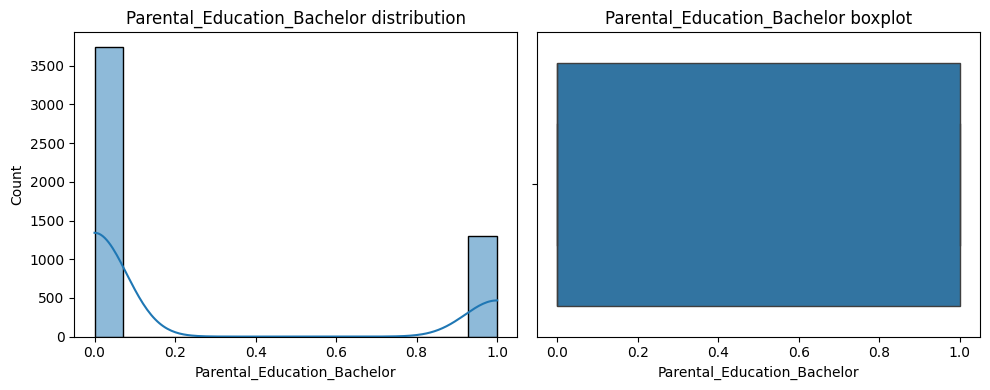

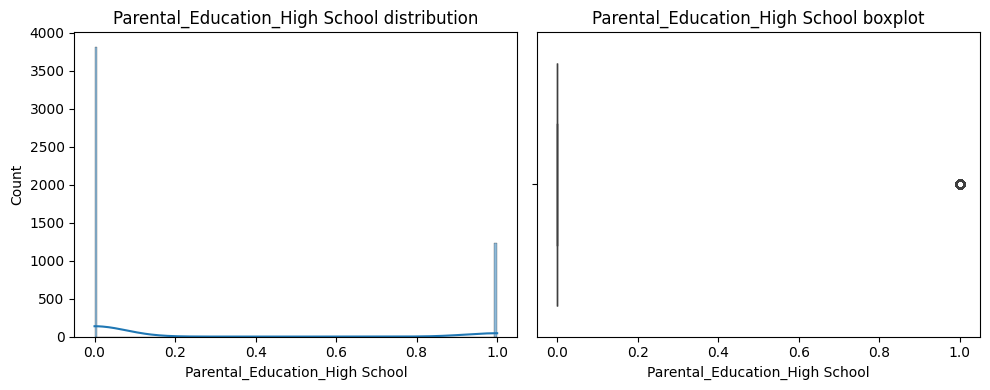

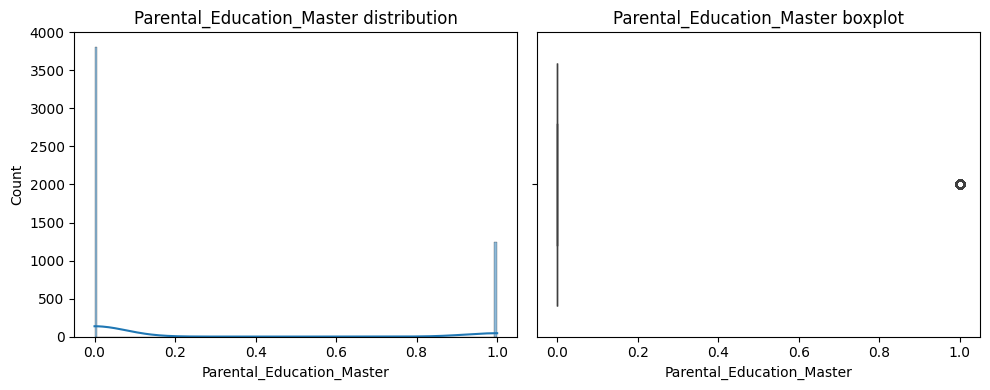

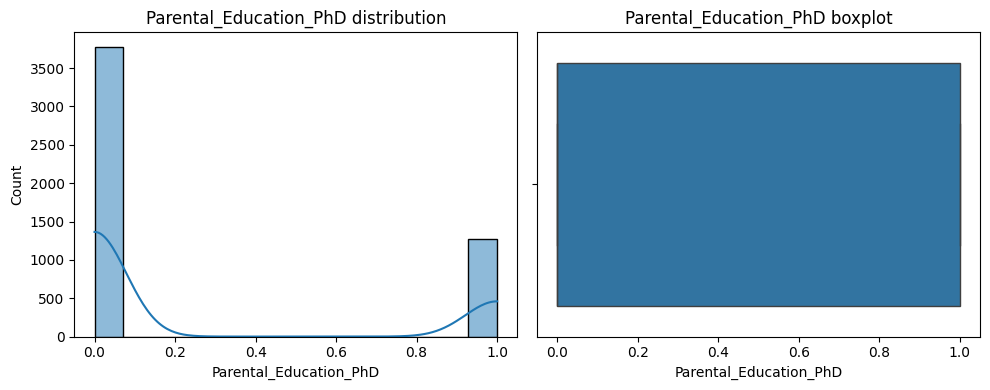

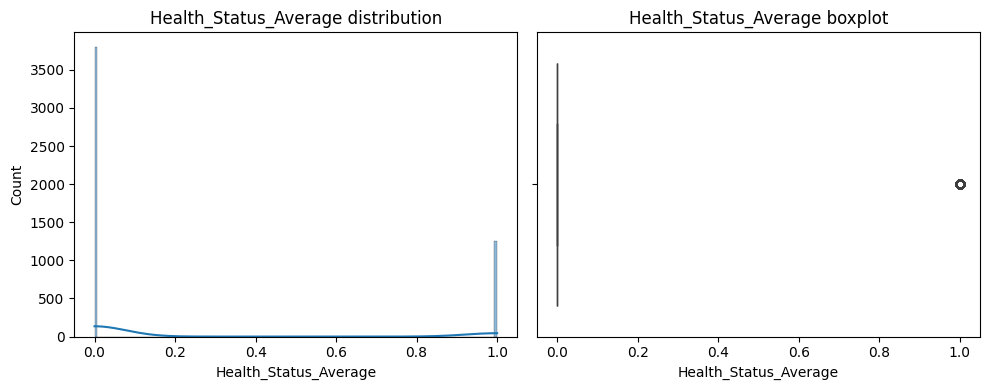

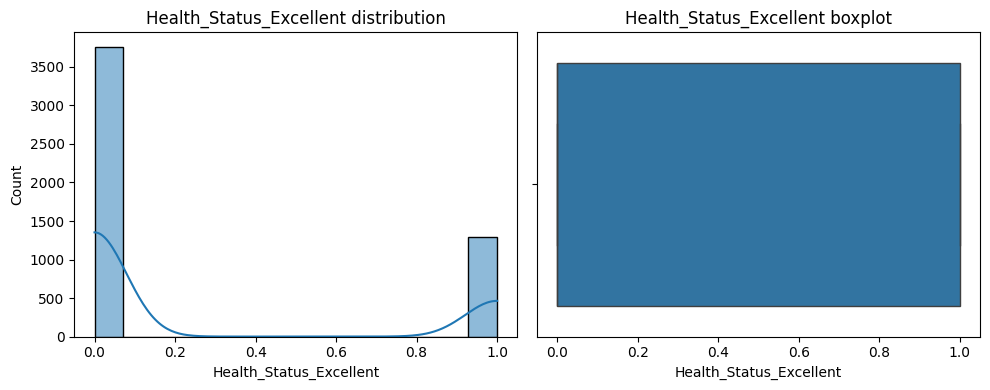

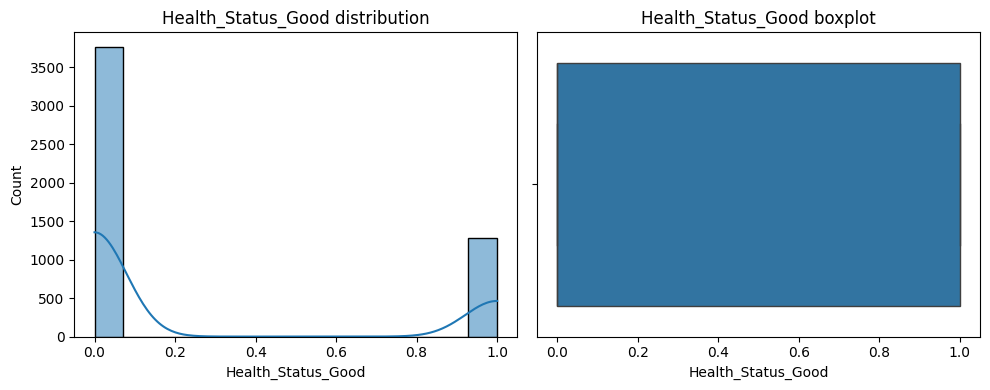

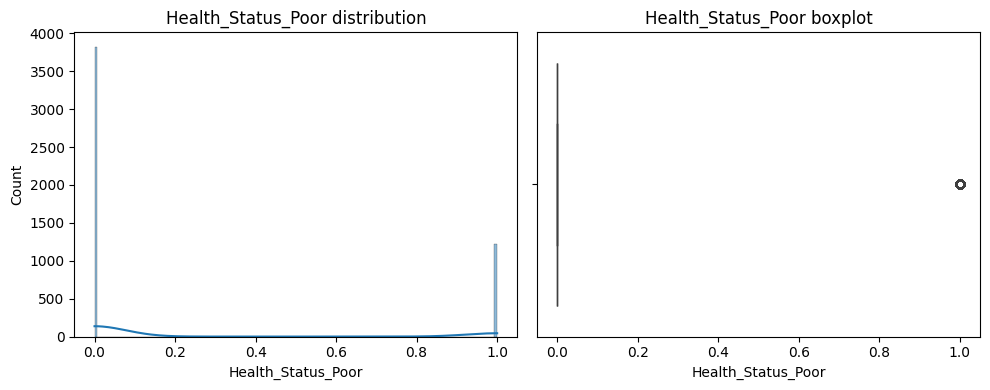

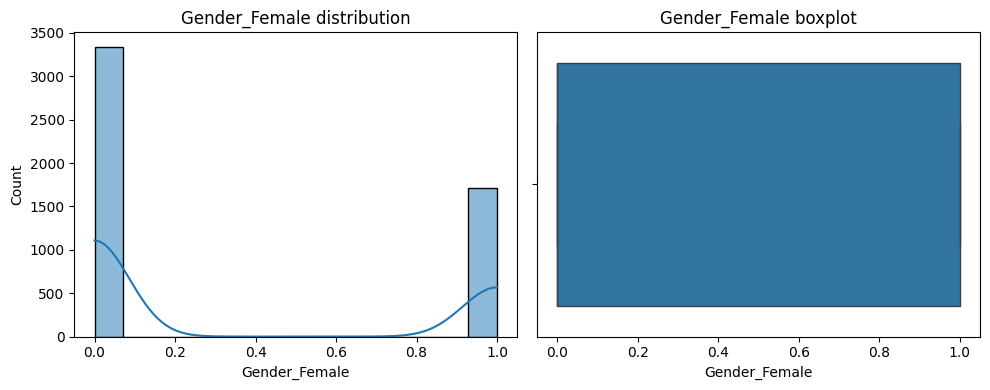

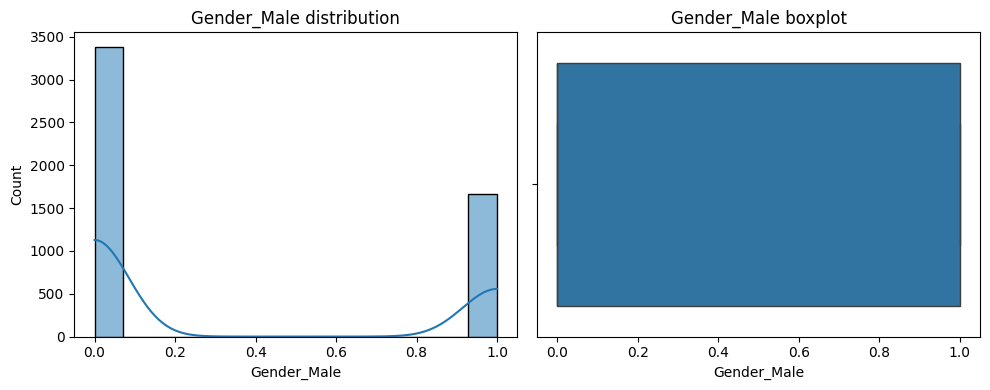

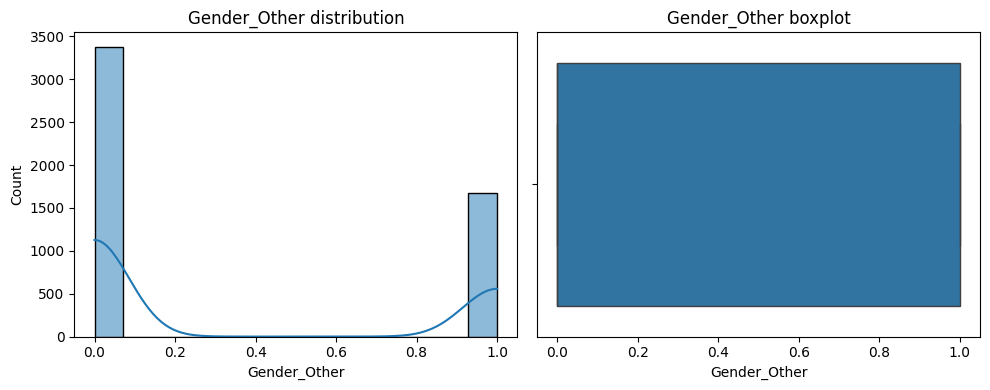

In [37]:
num_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    plt.figure(figsize=(10,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df_encoded[col].dropna(), kde=True)
    plt.title(f"{col} distribution")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df_encoded[col])
    plt.title(f"{col} boxplot")
    
    plt.tight_layout()
    plt.show()



In [42]:
df_encoded.to_csv("Cleaned_Dataset.csv")